# Task 1

Jortveit E. S.,  Røneid C. 

In [1]:
# Importing required libraries. 
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
# Position and velocity function from Velocity Verlet.
def position_verlet(r_i, v_i, f_i, delta_t, mass):
    r_i_1 = r_i + v_i*delta_t + (1/2)*(f_i/mass)*delta_t**2
    return r_i_1
def velocity_verlet(v_i, f_i, f_i_1, delta_t, mass):
    v_i_1 = v_i + ((f_i + f_i_1)/(2*mass))*delta_t
    return v_i_1

# Function for kinetic eneergy.
def kinetic_energy(mass, v):
    return ((mass/2)*(v**2))

# Defining the interaction potential energy funcion.
def inter_poten_energy(a, r_ij, eps):
    return eps*((a/r_ij)**12 - 2*(a/r_ij)**6)

# Defining the interaction potential force function, the derivative of the function above.
def inter_poten_force(a, r_ij, eps):
    return 12*eps*((a/r_ij)**12 - (a/r_ij)**6)/r_ij

# Task 1

### Task 1a, Task 1b and Task 1c

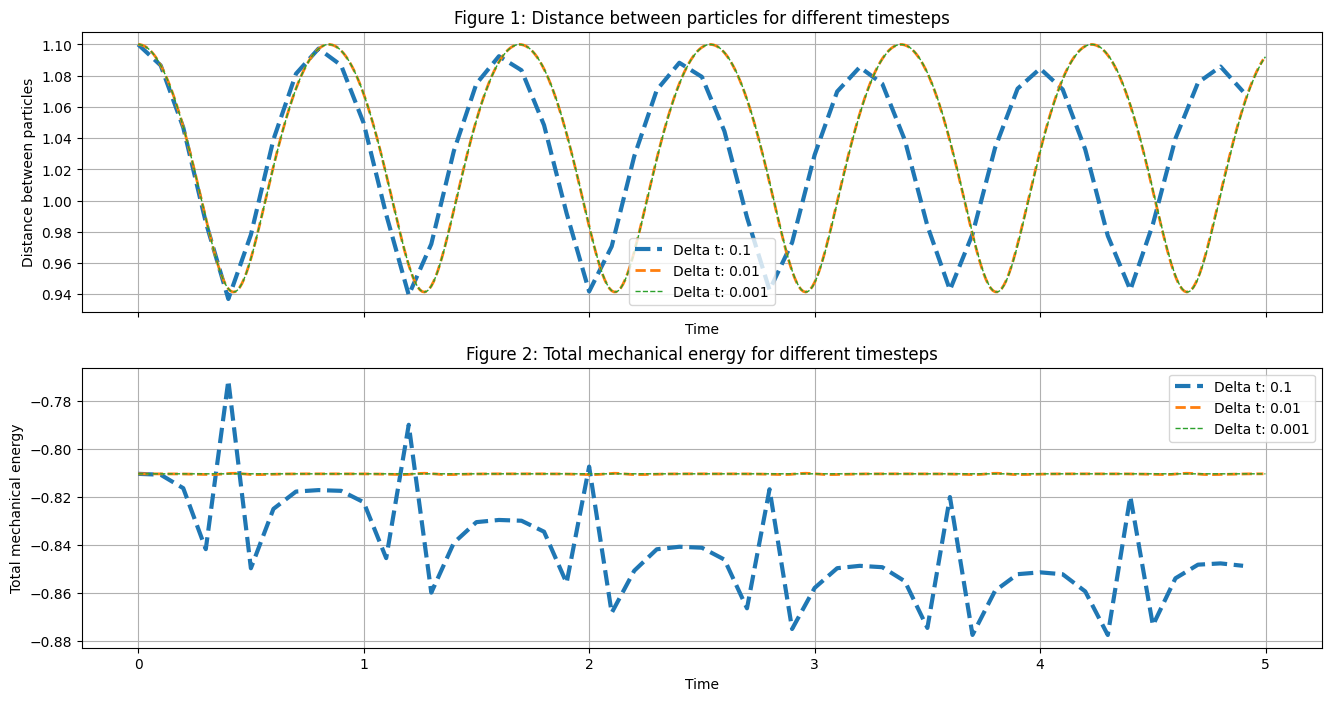

In [3]:
# Function to answer Task 1 a, b and c. 
def Task_One(mass, a, eps, time, initial_distance, initial_velocity):
    the_delta_ts = [0.1, 0.01, 0.001]
    labels = ["Delta t: 0.1", "Delta t: 0.01", "Delta t: 0.001"]
    plotting_icons = ['--', '--', '--']
    sim_number = 0

    # Initialize figures
    fig, (fig1, fig2) = plt.subplots(2, sharex = True, figsize = (16, 8))

    for delta_t in the_delta_ts:

        timesteps = np.arange(0, time, delta_t) # Hold values for the timesteps
        vel_res = np.zeros(len(timesteps))
        pos_res = np.zeros(len(timesteps))
        tot_en = np.zeros(len(timesteps))

        
        # Initial values
        pos_res[0] = initial_distance
        vel_res[0] = initial_velocity
        
        
        # Fill the arrays with data.
        for i in range(len(timesteps)-1):
            # Current force between particles.
            f_i = inter_poten_force(a, pos_res[i], eps)

            # New position of particle.
            pos_res[i+1] = position_verlet(pos_res[i], vel_res[i], f_i, delta_t, 1)

            # New force between particle.
            f_i_1 = inter_poten_force(a, pos_res[i+1], eps)

            # New velocity of particle.
            vel_res[i+1] = velocity_verlet(vel_res[i], f_i, f_i_1, delta_t, 1)
            
            # Adds total energy to total energy array.
            tot_en[i] = kinetic_energy(mass, vel_res[i]) + inter_poten_energy(a, pos_res[i], eps)

        # Fixes problem with last variable in list.
        tot_en[-1] = kinetic_energy(mass, vel_res[-1]) + inter_poten_energy(a, pos_res[-1], eps)

        # Plots values into the graphs. 
        fig1.plot(timesteps, pos_res, plotting_icons[sim_number], linewidth = 3-sim_number, label = labels[sim_number])
        fig2.plot(timesteps, tot_en, plotting_icons[sim_number], linewidth = 3-sim_number, label = labels[sim_number])
      
        sim_number += 1

    fig1.title.set_text('Figure 1: Distance between particles for different timesteps')
    fig1.set_xlabel('Time')
    fig1.set_ylabel('Distance between particles')
    fig1.legend()
    fig1.grid()

    fig2.title.set_text('Figure 2: Total mechanical energy for different timesteps')
    fig2.set_xlabel('Time')
    fig2.set_ylabel('Total mechanical energy')
    fig2.grid()
    fig2.legend()
  

Task_One(mass=1, a=1, eps=1, time=5, initial_distance=1.1, initial_velocity=0)

From Figure 1 and Figure 2 it is obvious that the step size delta t is important to the precision of the results. From the blue dotted lines we understand that this is not precise enough. From the orange and green plots we observe that they are almost identical. While 0.001 would be the more precise option, one could argue that a step size of 0.01 gives shorter computing times and are almost as precise as 0.001. Therefore we will use 0.01 as the step size for the remainder of the project. 

# Task 2

In [4]:
# Function designed to give particles random directions with a total velocity of v0. 
def randomDirectionv2(v0):
    theta_random_vinkel = random.randrange(0,360)
    v0_x_direction = v0*math.cos(math.radians(theta_random_vinkel))
    v0_y_direction = v0*math.sin(math.radians(theta_random_vinkel))

    return v0_x_direction, v0_y_direction

In [5]:
# Makes the matrix that we use to store values for simulations on the format of [x_pos, y_pos, v_x ,v_y]
def Make_Matrix(N, timesteps, v0):
    height = int(np.sqrt(N))
    Result_matrix = np.zeros((timesteps, N, 4))
    
    # Initial values 
    x_dir = 0.5
    y_dir = np.sqrt(1**2 - 0.5**2)


    # For every particle.
    for i in range(height):

        # Hexagonal packing.
        # X-direction.
        for j in range(height):
            if (j % 2) == 0:
                Result_matrix[0, i + j*height, 0] = x_dir + i
            else:
                Result_matrix[0, i + j*height, 0] = i

        # Y-direction.
        for j in range(height*i , height*i + 1):
            for h in range(height):
                Result_matrix[0, j+h, 1] = i*y_dir

        # Fills in random velocities in x- and y-direction.
        for k in range(N):
            x_velocity, y_velocity = randomDirectionv2(v0)
            Result_matrix[0, k, 2] = x_velocity
            Result_matrix[0, k, 3] = y_velocity

                
    return Result_matrix

### Task 2a

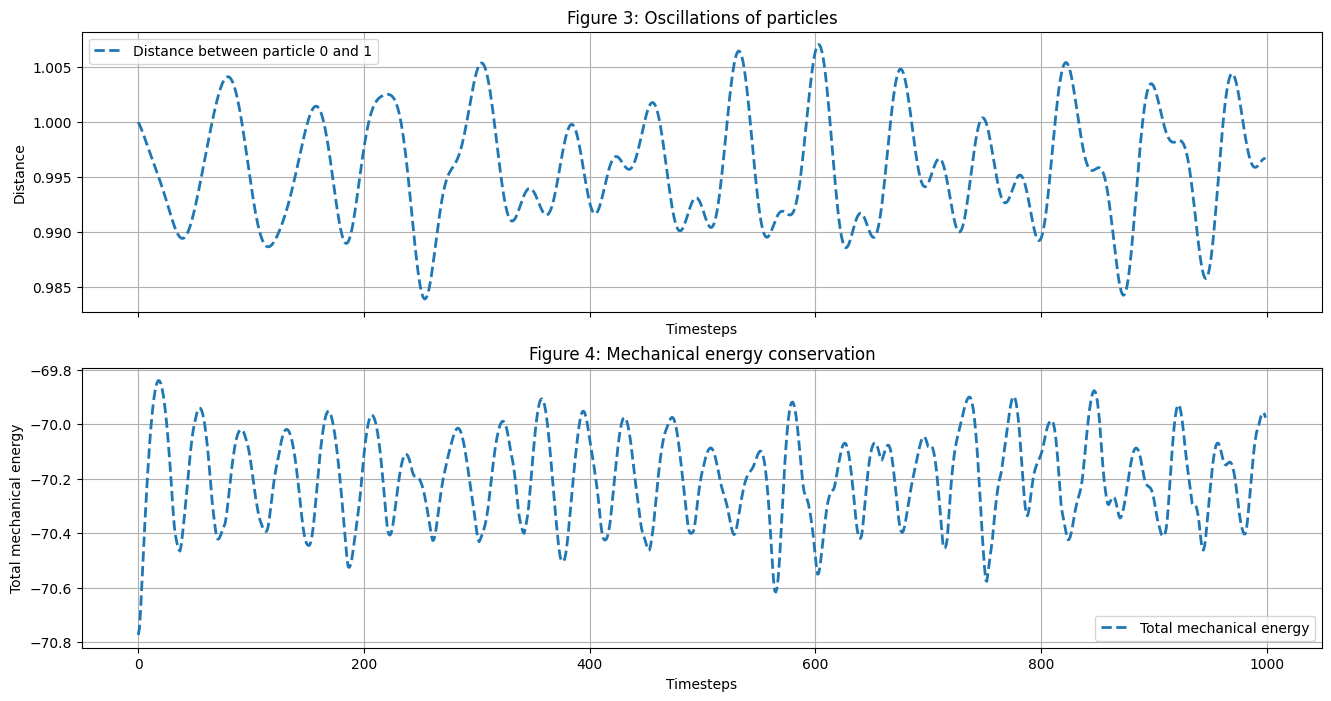

In [6]:
# Function to answer Task 2.
def Velocity_Verlet_2(N, timesteps, v0, reference_particle, plotted_particle, delta_t, return_or_plot, only_distance, task2c, fignumber):
    
    matrix2 = Make_Matrix(N, timesteps+1, v0)
    timesteps_graph = np.zeros(timesteps)
    distance_graph_1 = np.zeros(timesteps)
    total_kinetic_energy = np.zeros(timesteps)
    total_potential_energy = np.zeros(timesteps)
    total_mechanical_energy = np.zeros(timesteps)

    # For every timestep
    for i in range(timesteps):
        timesteps_graph[i] = i
        kinetic_energy = 0

        # For every particle in current timestep
        for j in range(len(matrix2[0])):

            # Makes values to store x- and y-force values. 
            force_x = 0
            force_y = 0
        
            # For all other particles in current timestep
            for k in range(len(matrix2[0])):

                # Skip identical particle
                if k == j:
                    continue

                # Find current distance, force and angle between particles
                current_distance = math.dist((matrix2[i,j,0],matrix2[i,j,1]),(matrix2[i,k,0], matrix2[i,k,1]))
                current_force = inter_poten_force(1, current_distance, 1)
                angle_between = np.arctan2(-matrix2[i,k,1]+matrix2[i,j,1], -matrix2[i,k,0]+matrix2[i,j,0])          

                # Force in x- and y-direction
                force_x += current_force*np.cos(angle_between)
                force_y += current_force*np.sin(angle_between)

                total_potential_energy[i] += inter_poten_energy(1, current_distance, 1)  

            if i != 0:
                # New velocity of particle
                matrix2[i, j, 2] += force_x/(2*1)*delta_t
                matrix2[i, j, 3] += force_y/(2*1)*delta_t

            # Find new position for particle, x and y
            matrix2[i+1, j, 0] = position_verlet(matrix2[i, j, 0], matrix2[i, j, 2], force_x, delta_t, 1) # New x-position
            matrix2[i+1, j, 1] = position_verlet(matrix2[i, j, 1], matrix2[i, j, 3], force_y, delta_t, 1) # New y-position
            
            # New force between particle
            current_distance_2 = math.dist((matrix2[i,j,0],matrix2[i,j,1]),(matrix2[i,k,0], matrix2[i,k,1]))
            next_dist = math.dist((matrix2[i+1,j,0],matrix2[i+1,j,1]),(matrix2[i+1,k,0], matrix2[i+1,k,1]))
            next_force = 0

            # New velocity of particle
            matrix2[i+1, j, 2] = velocity_verlet(matrix2[i, j, 2], force_x, next_force, delta_t, 1) 
            matrix2[i+1, j, 3] = velocity_verlet(matrix2[i, j, 3], force_y, next_force, delta_t, 1)

            # Add together all kinetic energy of the particles
            total_kinetic_energy[i] += np.sqrt(matrix2[i, j, 2]**2 + matrix2[i, j, 3]**2)
            total_mechanical_energy[i] = total_kinetic_energy[i] + total_potential_energy[i] 

        # For plotting distance between particles
        distance_graph_1[i] = math.dist((matrix2[i,reference_particle,0],matrix2[i,reference_particle,1]),(matrix2[i,plotted_particle,0], matrix2[i,plotted_particle,1]))

    # This last part is in order to give the function some flexibility to plot different graphs. 
    if only_distance == True:
        plt.figure(figsize = (14, 4))
        plt.plot(timesteps_graph, distance_graph_1, '--', linewidth = 2, label = f'Distance between particle {reference_particle} and {plotted_particle}')
        plt.xlabel('Timesteps')
        plt.ylabel('Distance')
        plt.title(f'Figure {fignumber}: Distance between neighbouring particles')
        plt.grid()
        plt.show()
    else:
        if return_or_plot == 0:
            if task2c == False:
                return matrix2

        if return_or_plot == 1:
            # Initialize figures
            fig, (fig1, fig2) = plt.subplots(2, sharex = True, figsize = (16, 8))
            fig1.plot(timesteps_graph, distance_graph_1, '--', linewidth = 2, label = f'Distance between particle {reference_particle} and {plotted_particle}')
            fig1.legend()
            fig1.grid()
            fig1.title.set_text(f'Figure {fignumber}: Oscillations of particles')
            fig1.set_xlabel('Timesteps')
            fig1.set_ylabel('Distance')

            fig2.plot(timesteps_graph, total_mechanical_energy, '--', linewidth = 2, label = f'Total mechanical energy')
            fig2.set_xlabel('Timesteps')
            fig2.set_ylabel('Total mechanical energy')
            fig2.title.set_text(f'Figure {fignumber+1}: Mechanical energy conservation')
            fig2.legend()
            fig2.grid()

    if task2c == True:
        return total_kinetic_energy, total_mechanical_energy, total_potential_energy

        
Velocity_Verlet_2(16, 1000, 0.01, reference_particle=0, plotted_particle=1, delta_t=0.01, return_or_plot=True, only_distance=False, task2c=False, fignumber=3)


The plots are as expected. In Figure 3 we can see the particles oscillate with similarity to that of the particles in Task 1. In Figure 4 is is easy to see that the mechanical energy is conserved to good degree with an error of approximately 0.1 percent. 

### Task 2b

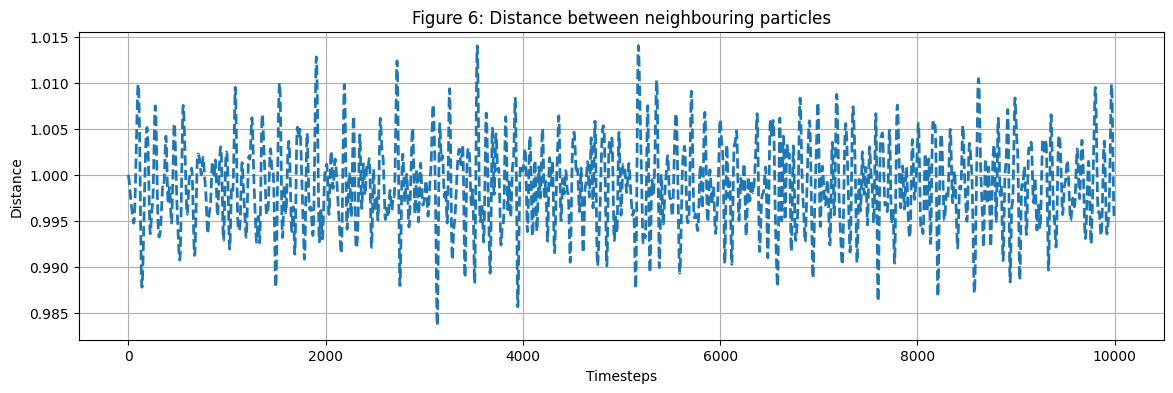

In [7]:
Velocity_Verlet_2(N=25, timesteps=10000, v0=0.01, reference_particle=23, plotted_particle=24, delta_t=0.01, return_or_plot=True, only_distance=True,task2c=False, fignumber=6)

In Figure 6 we have plotted the oscillations between particle 23 and 24 in our 25-particle structure. We still use the Delta T of 0.01 as this gives reasonable results. In 10000 time steps is is possible to observe approximately 100 oscillations. For 25 particles and 10000 time steps, out program use about 35 seconds to plot the graph, while with 16 particles it takes about 15 seconds. 

### Task 2c

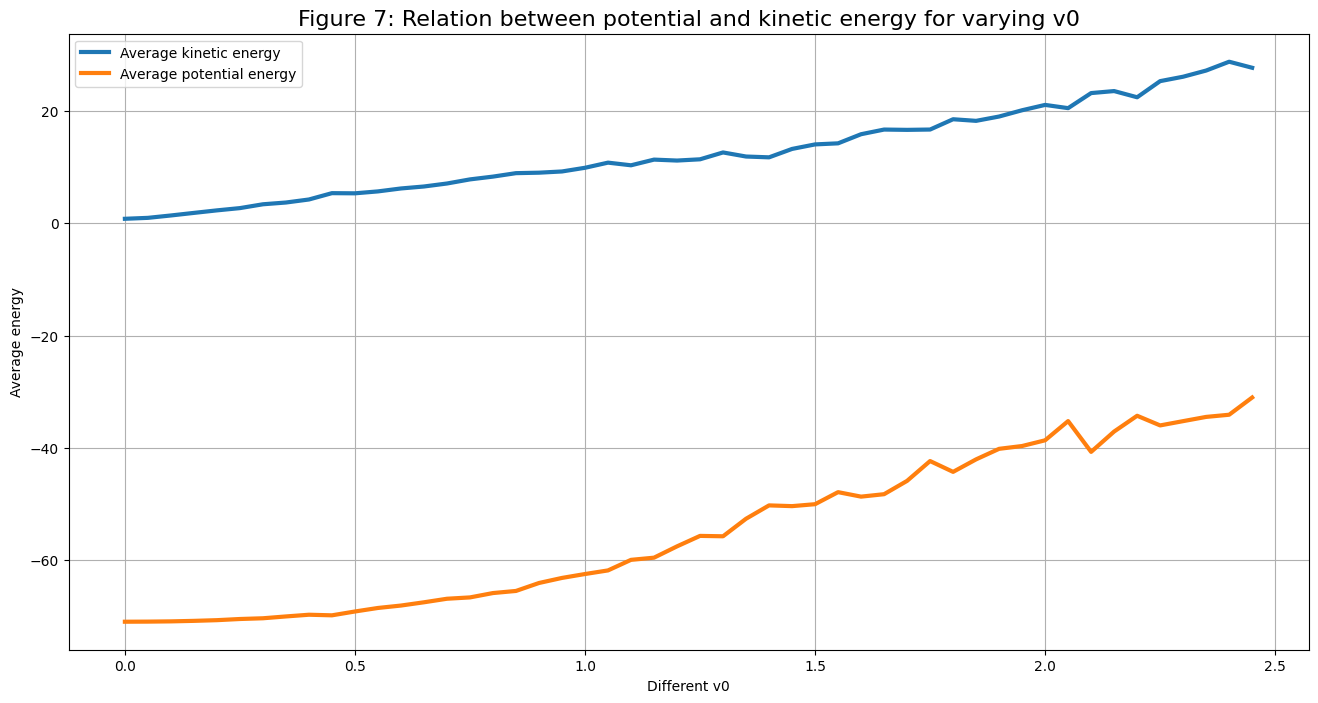

In [8]:
# Function to return average value of an array.
def average_maker(kinetic, potential):
    sum_kin_energy = 0
    sum_pot_energy = 0

    for i in range(len(kinetic)):
        sum_kin_energy += kinetic[i]
        sum_pot_energy += potential[i]

    average_kinetic = sum_kin_energy/len(kinetic)
    average_potential = sum_pot_energy/len(potential)

    return average_kinetic, average_potential

# Makes averages based on arrays for different v0s. 
def average_energy_for_v0s(v00):
    tot_kin_E, tot_mech_E, tot_pot_E = Velocity_Verlet_2(16, 100, v00, 0, 1, 0.01, return_or_plot=False, only_distance=False, task2c=True, fignumber=6789)
    kin, pot = average_maker(tot_kin_E, tot_pot_E)
    return kin, pot


# Plotts relation between kinetic and potential energy. 
def plotting(v0, length):

    averages_kinetic = np.zeros(length)
    averages_potential = np.zeros(length)

    for i in range(len(averages_kinetic)):
        kin_av, pot_av = average_energy_for_v0s(v0*i)
        averages_kinetic[i] = kin_av
        averages_potential[i] = pot_av

    timesteps = np.arange(0, v0*length, v0)
    plt.figure(figsize = (16, 8))
    plt.plot(timesteps, averages_kinetic, linewidth = 3, label = "Average kinetic energy")
    plt.plot(timesteps, averages_potential, linewidth = 3 ,label = "Average potential energy")
    plt.xlabel('Different v0')
    plt.ylabel('Average energy')
    plt.title('Figure 7: Relation between potential and kinetic energy for varying v0', fontsize = 16)
    plt.legend()
    plt.grid()
    plt.show()


plotting(v0=0.05, length=50)

As we see from the figure above, it is a clear linear dependence between potential and kinetic energy for low values of v0. For values of v0 up until a velocity of approximately 0.8 the plots follow an almost identical path, but for higher values, they start fluctating. This could be a result of the substance going from a solid state to a liquid state. This demands energy, and needs to be taken from somewhere. That is perhaps why we see that the distance between the graphs decrease when v0 increases. So the reason for the linear dependence of the kinetic and potential energy for low v0 is that no energy is yet being used for phase transitions. 

### Task 2d

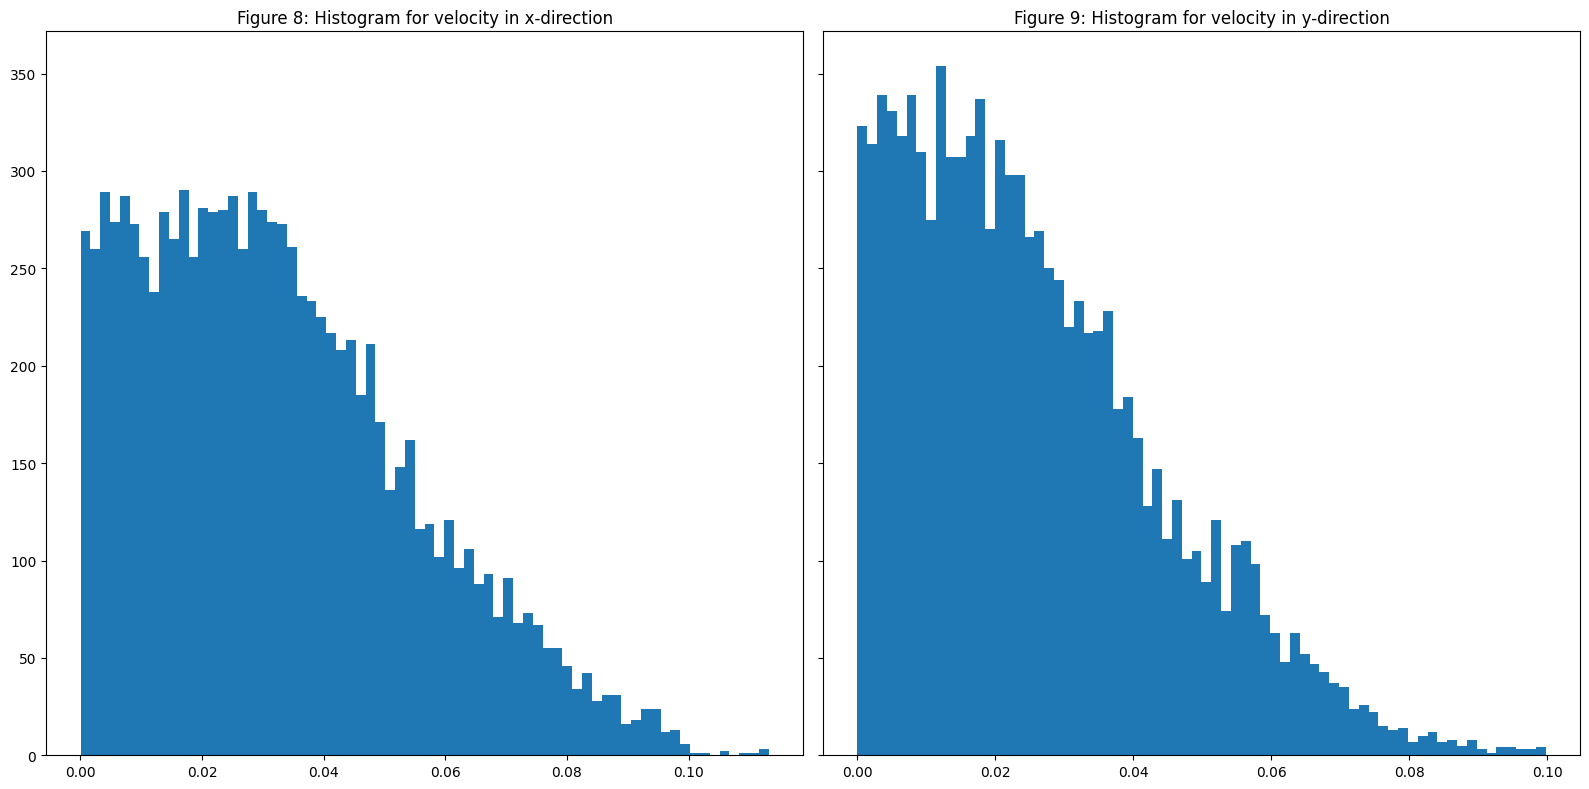

In [9]:
# Function that makes the histograms. 
def make_histograms(N, plotted_particle, v0, delta_t, timesteps, time, bins):
    results = Velocity_Verlet_2(N, timesteps-1, v0, 0, 1, delta_t, return_or_plot=False, only_distance=False, task2c=False, fignumber=0)

    timesteps_graph = np.arange(0, time, delta_t)
    v_x_results = np.zeros(len(results))
    v_y_results = np.zeros(len(results))

    for i in range(len(results)):
        v_x_results[i] = abs(results[i, plotted_particle, 2])
        v_y_results[i] = abs(results[i, plotted_particle, 3])

    fig, axs = plt.subplots(1, 2, sharey=True, figsize = (16, 8), tight_layout=True)
    axs[0].title.set_text('Figure 8: Histogram for velocity in x-direction')
    axs[0].hist(v_x_results, bins)
    axs[1].title.set_text('Figure 9: Histogram for velocity in y-direction')
    axs[1].hist(v_y_results, bins)

make_histograms(N=16, plotted_particle=11, v0=0.01, delta_t=0.01, timesteps=10000, time=10, bins=70)

From Figure 8 and 9 in above we can see the distribution of velocities in x and y direction. The graphs have some resemblance of the Maxwell distribution, but it is not identical. We chose to operate with the absolute value of the velocities as we believe this shows the results better. 

### Task 2e

Velocity 0.5


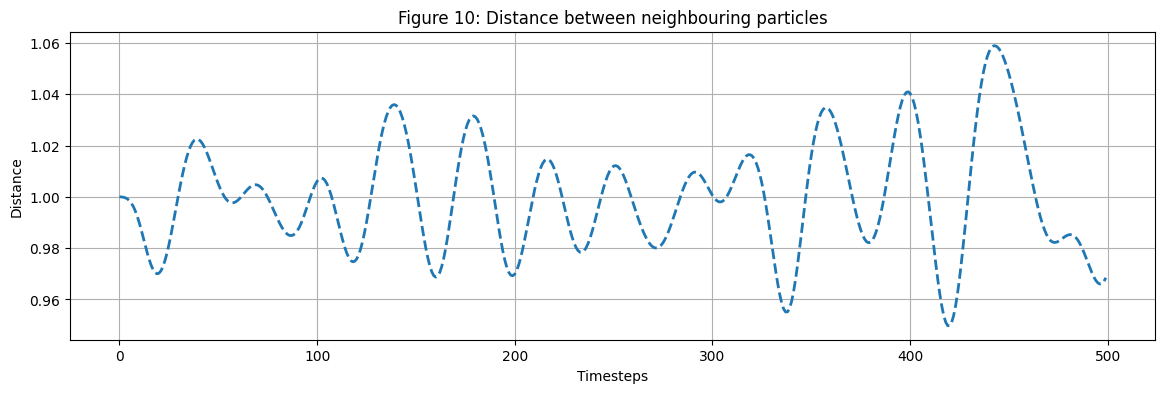

Velocity 1.0


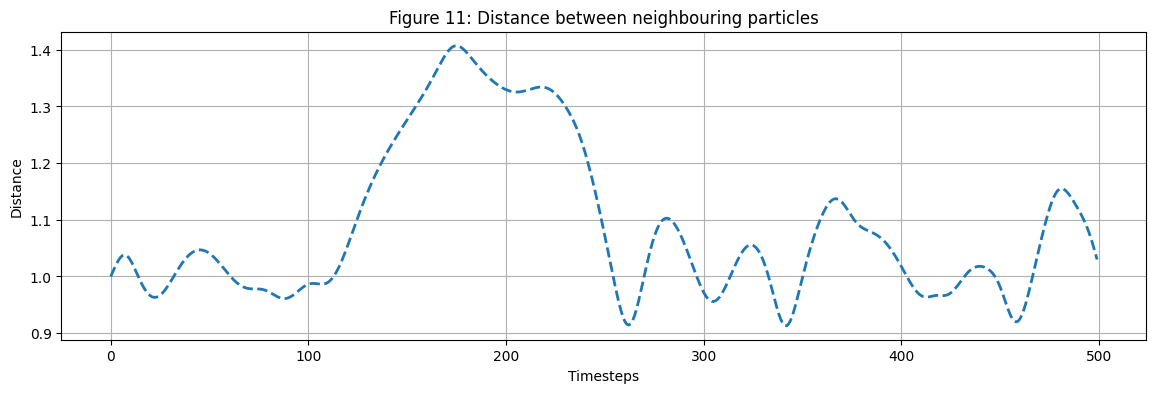

Velocity 1.5


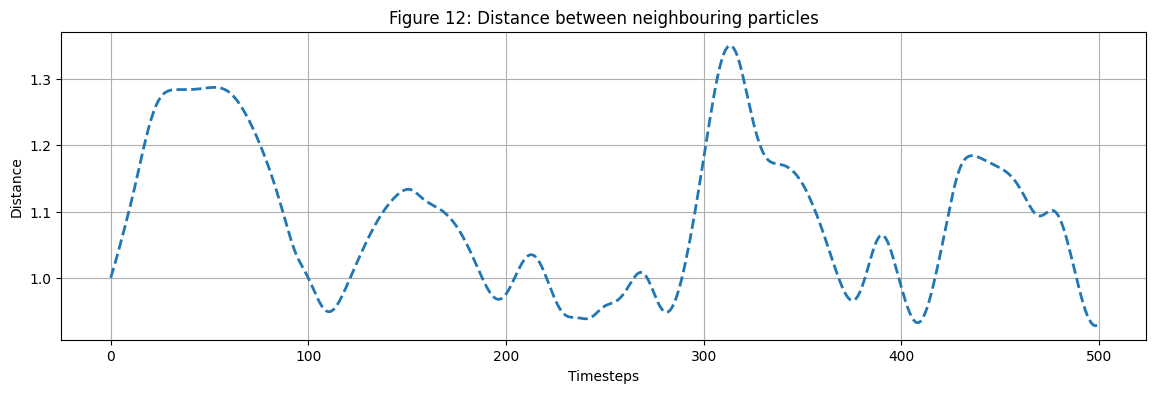

Velocity 2.0


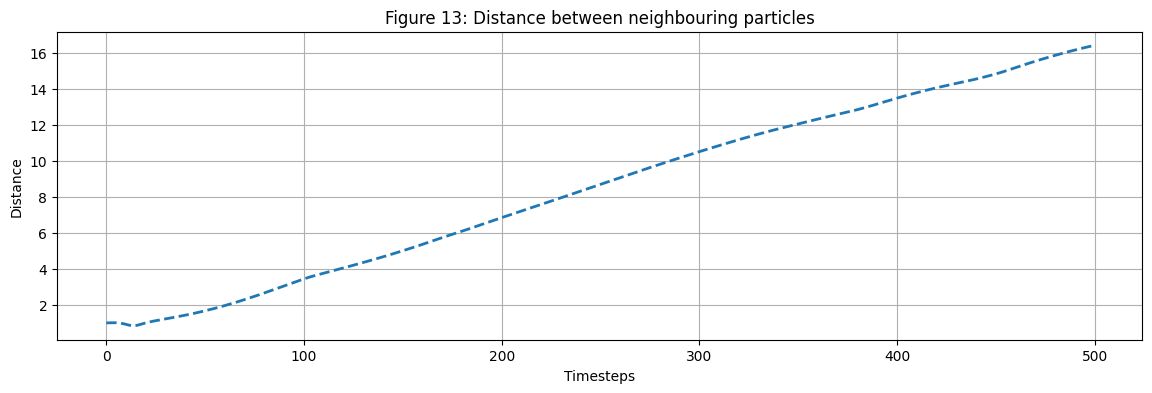

Velocity 2.5


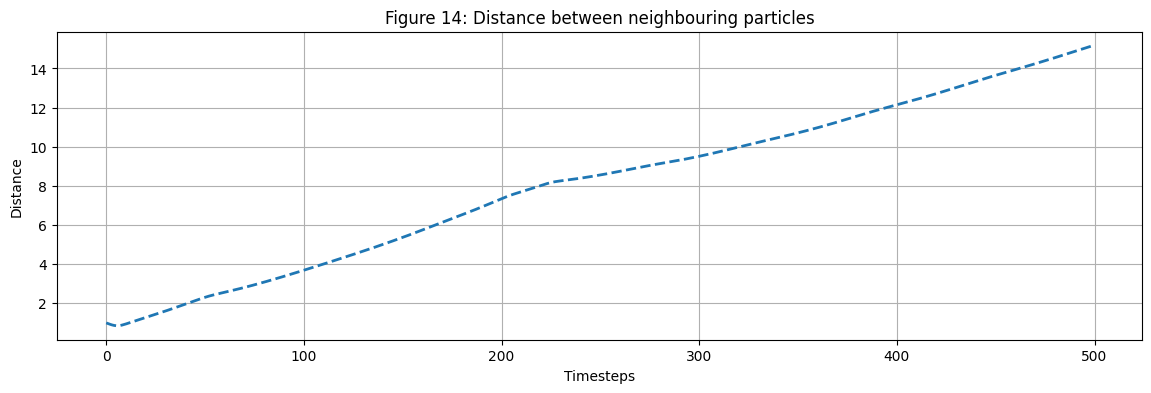

Velocity 3.0


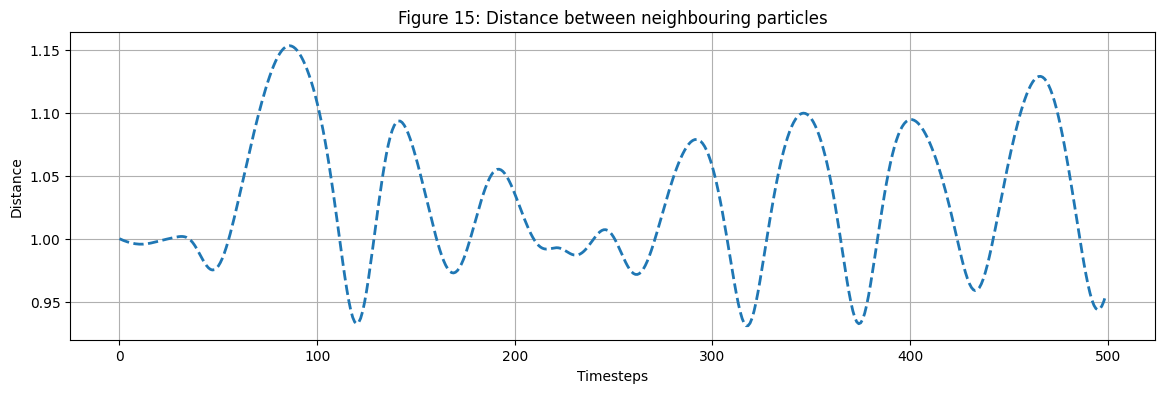

Velocity 3.5


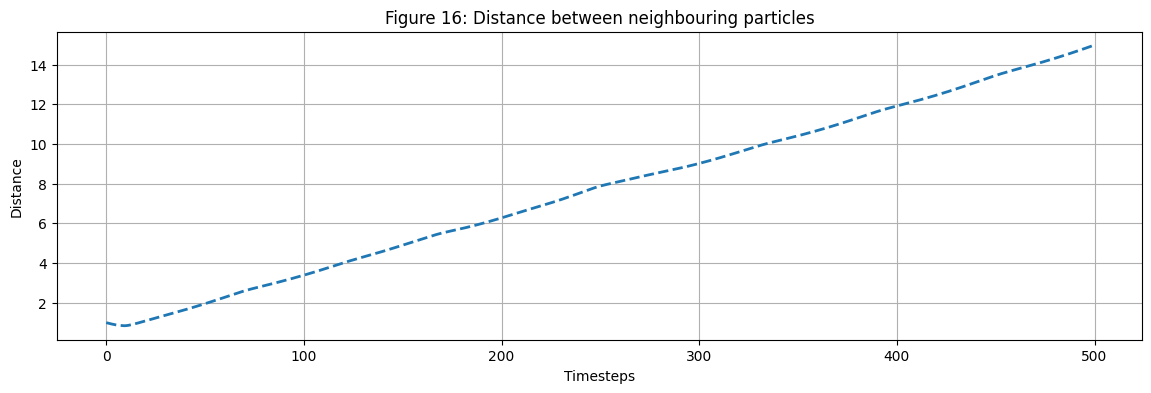

Velocity 4.0


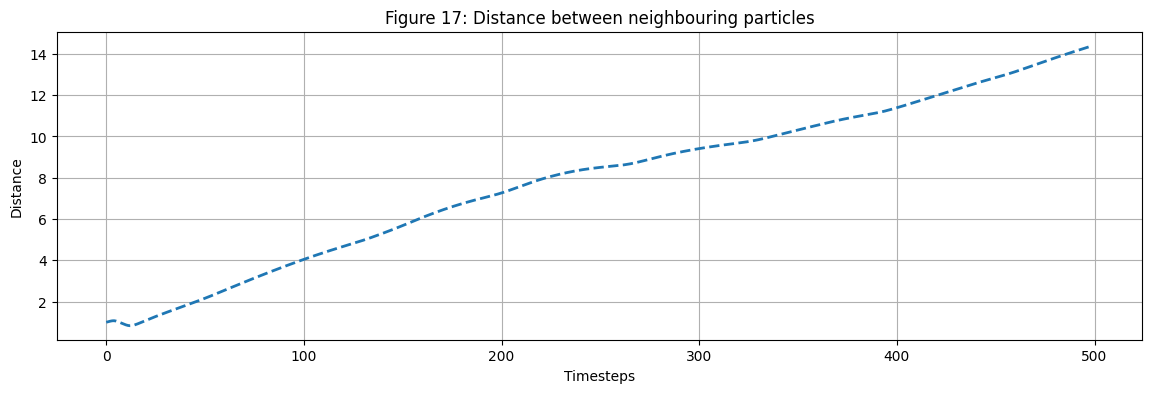

In [10]:
# Makes matrix with initial values.
for i in range(8):
    print(f'Velocity {0.5 + 0.5*i}')
    Velocity_Verlet_2(N=16, timesteps=500, v0=0.5*i + 0.5, plotted_particle=0, reference_particle=1, delta_t=0.01, return_or_plot=True, only_distance=True, task2c=False, fignumber=10+i)

There was indeed higher fluctuations when the initial velocity was increased. From the figures we clearly see that the distance between the particles are increasing with velocity, hence the solid structure changes form. Some of the figures will show that the hexagonal structure is gone, but the particles still stay together, hence having a liquid structure. Other figures shows the substance becoming a gas. When running the program multiple times, we found that for velocities between approximately 0.1 and 0.6 the substance is in solid form. From 0.7 till 1.5 the substance was in liquid form and from 1.6 and above it was reasonable to expect the substance to be in gas form. However, these are not exact numbers and we found it still possible to find hexagonal structure for v0 above 1.5 and gas structure for v0 below 1.5. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f3c273b9-3072-4c3c-a8a9-9ae7fd521ce7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>